In [37]:
#Environment check
import os
import warnings
warnings.filterwarnings("ignore")

In [38]:
#Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# **<span style="color:#FF731D;">📰Get Data </span>**

In [39]:
data = "input/Osteosarcoma"

In [40]:
image_dir = Path(data)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) 

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [41]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(data).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

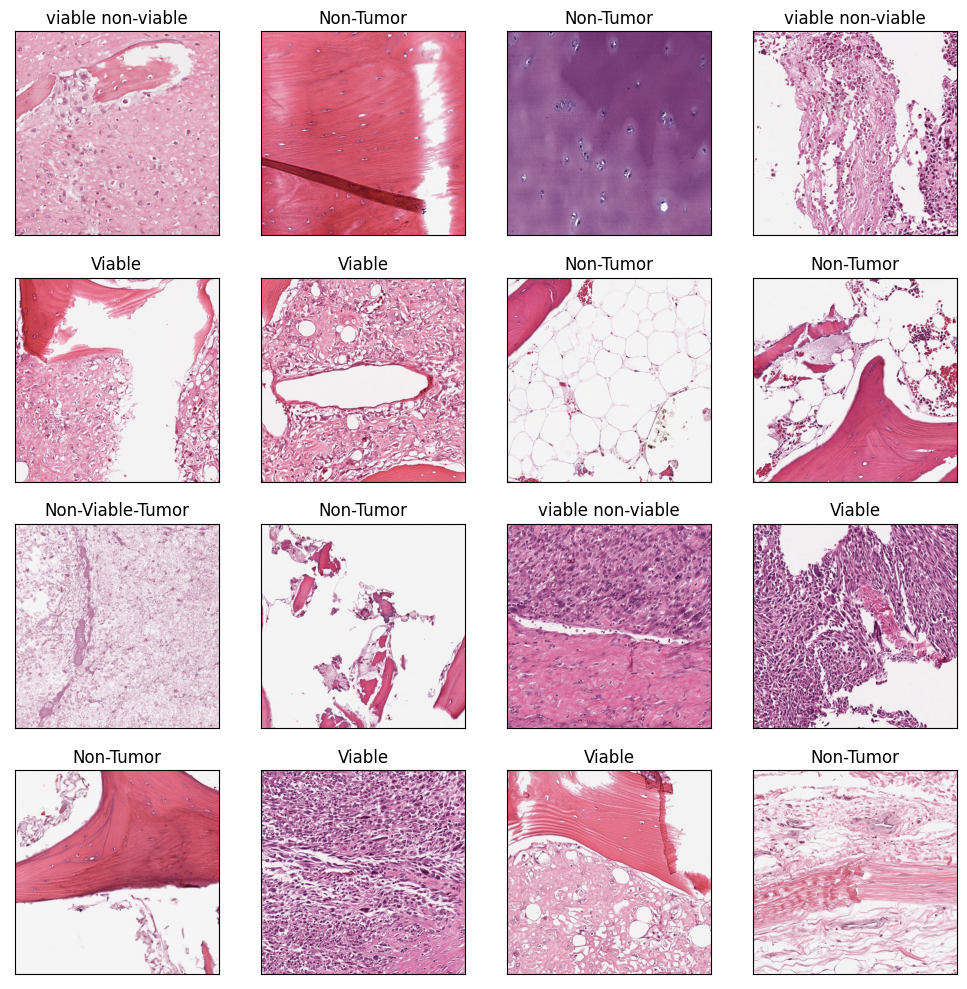

In [42]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)  # set validation split


In [44]:
train_images = train_datagen.flow_from_directory(
    data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
)  # set as training data

validation_images = train_datagen.flow_from_directory(
    data,  # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
)  # set as validation data


Found 917 images belonging to 4 classes.
Found 227 images belonging to 4 classes.


In [45]:
train_images.class_indices

{'Non-Tumor': 0, 'Non-Viable-Tumor': 1, 'Viable': 2, 'viable non-viable': 3}

In [46]:
validation_images.class_indices

{'Non-Tumor': 0, 'Non-Viable-Tumor': 1, 'Viable': 2, 'viable non-viable': 3}

# **<span style="color:#FF731D;">🌟Let's try CNN Model</span>**

In [47]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])


In [48]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=validation_images,
    validation_steps=len(validation_images),
    epochs=10,
)

Epoch 1/10
 1/29 [>.............................] - ETA: 49s - loss: 1.4237 - accuracy: 0.0938

KeyboardInterrupt: 

In [ ]:
model.save(os.path.join('models','Osteosarcoma1.h5'))

***Model is overfitting***

In [ ]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **<span style="color:#FF731D;">🌟Let's try Inception Model (Transfer Learning)</span>**

In [ ]:
inception_model = Sequential()

pretrained_model = tf.keras.applications.InceptionV3(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg', classes=4,
    weights='imagenet',
)
for layer in pretrained_model.layers:
    layer.trainable = False

inception_model.add(pretrained_model)


In [ ]:
inception_model.add(Flatten())
inception_model.add(Dense(512, activation='relu'))
inception_model.add(Dropout(0.2))
inception_model.add(Dense(4, activation='softmax'))

In [ ]:
inception_model.summary()

In [ ]:
inception_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

history = inception_model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=validation_images,
    validation_steps=len(validation_images),
    epochs=10
)


In [ ]:
inception_model.save(os.path.join('models','Osteosarcoma2.h5'))

In [ ]:
print(history.history.keys())

In [ ]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **<span style="color:#DA291C;">🤘Conclusion</span>**

> **This marks the end of 🧠Alzheimer Classification with MRI Images**

> **Stay Tuned for more..**

> **Please share your feedback and suggestions and help me improve 😇**